## PROJECT PROPOSAL: Predicted Chest Pain Type in Cleveland, Ohio 
(Section 002, Group 31)

## Introduction

**Background:**
    Heart disease is the leading cause of death in the United States, including the city of Cleveland in Ohio. Factors that affect the probability of contracting heart disease include, unhealthy diet, high blood pressure, high cholesterol, minimal physical activity, etc. (“Heart disease,” 2022). While heart disease symptoms depend on the type of heart disease, many common symptoms include chest pain, shortness of breath, and pain in the neck, jaw, and throat. As noted, chest pain is often associated with heart disease. Particularly angina is a chest pain caused by poor blood flow to the heart due to the buildup of thick plaques on the inner walls of the arteries carrying blood to the heart, thereby restricting the heart’s supply of blood (“Chest pain,” 2023). Several genetic and lifestyle factors contribute to the risk of developing angina. For example, there is evidence of a positive relationship between age and developing angina; an increase of plaque build up in the arteries is correlated with an increase in age (“Causes and risk,” n.d.).  

**Question:** Is it possible to predict chest pain type (1=typical angina, 2=atypical angina, 3=non-anginal pain or 4=asymptomatic*) for a given heart disease patient based on various revelent medical factors and patient information?

**Variables of Interest (so far):**
1. `age` (years)
2. `sex` (1=male; 0=female)
3. `restbp` = resting blood pressure. (mm Hg)
4. `chol` = serum cholesterol. (mg/dl)
6. `thalach` = maximum heart rate achieved.
7. `exang` = exercise-induced angina. (1=yes; 0=no)

**Dataset:** Cleveland Heart Disease Processed Data set from https://archive.ics.uci.edu/ml/datasets/Heart+Disease. 

**Reference List:**

Centers for Disease Control and Prevention. (2022, August 12). Heart disease deaths - health, United States. Centers for Disease Control and Prevention. Retrieved March 11, 2023, from https://www.cdc.gov/nchs/hus/topics/heart-disease-deaths.htm#:~:text=Heart%20disease%20has%20been%20the,excessive%20alcohol%20use%20(2)

Mayo Foundation for Medical Education and Research. (2023, March 3). Chest pain. Mayo Clinic. Retrieved March 11, 2023, from https://www.mayoclinic.org/diseases-conditions/chest-pain/symptoms-causes/syc-20370838

U.S. Department of Health and Human Services. (2022, March 24). Causes and risk factors. National Heart Lung and Blood Institute. Retrieved March 11, 2023, from https://www.nhlbi.nih.gov/health/angina/causes



## Preliminary Data Analysis

Here, we will read, tidy, summarize, and visualize the dataset.

In [1]:
#attach necessary libraries
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [8]:
#read data
#add names to columns based on information from website

data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                           col_names = FALSE)
heart_data <- data |> 
        rename(
            age = X1,
            sex = X2,
            cp = X3,
            restbp = X4,
            chol = X5,
            fbs = X6, 
            restecg = X7,
            thalach = X8,
            exang = X9,
            oldpeak = X10,
            slope = X11,
            ca = X12,
            thal = X13,
            num = X14) 
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


We will not use all the variables to answer our research question. Below we will select the specific columns based on our variables of interest to clean and wrangle the data. For instance, some columns are unspecified or don't have enough information on their meaning from the website (`thal`, `oldpeak`, `slope`, `ca`, and `num`), so we will not include them. Some columns are untidy (categorical values are listed numerically, which may be unhelpful when trying to visualize and understand the data), so we will tidy them. 

In [4]:
#clean and wrangle data
#select columns within the dataset corresponding with our selected variables of interest 
#mutate certain rows to change the type of character a variable is listed as 

filter_data <- heart_data|>
    select(cp, age, restbp, chol, thalach, sex, exang)|>
    mutate(cp = as_factor(cp))|>
    mutate(sex = as_factor(sex)) |>
    mutate(exang = as_factor(exang))

The columns `cp`, `sex`, and `exang` were all mutated in order to change the type of character the variables were listed as.

In [5]:
#split data into training and testing, with 75% of data as training.
set.seed(2000)

heart_split <- initial_split(filter_data, prop = 0.75, strata=cp)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

Since splitting the data is a randomized process, we used the function `set.seed` to ensure reproducibility. The data has now been split into a training set to train our classifier, and a testing set to test its accuracy. In testing the performance of the classifier on new unseen data, we can ensure that the model is reliable and accurate in predicting chest pain type and can be generalize to new data.

In [6]:
#using training data, summarize data into tables of count, mean values, and median values
count_cp <- heart_train|>
    group_by(cp)|>
    summarize(count = n()) |>
    mutate(percent = 100*count/nrow(heart_train))
count_cp

mean_variables <- heart_train |>
    group_by(cp) |>
    summarize(mean_age=mean(age, na.rm=TRUE),
             mean_restbp=mean(restbp, na.rm=TRUE),
             mean_chol=mean(chol, na.rm=TRUE),
             mean_thalach=mean(thalach, na.rm=TRUE))
mean_variables

median_variables <- heart_train |>
    group_by(cp) |>
    summarize(median_age=median(age, na.rm=TRUE),
             median_restbp=median(restbp, na.rm=TRUE),
             median_chol=median(chol, na.rm=TRUE),
             median_thalach=median(thalach, na.rm=TRUE))
median_variables

cp,count,percent
<fct>,<int>,<dbl>
1,19,8.444444
2,36,16.000000
3,63,28.000000
4,107,47.555556


cp,mean_age,mean_restbp,mean_chol,mean_thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,56.52632,140.6316,239.7895,153.8421
2,50.25000,127.7500,235.8333,163.9722
3,54.69841,130.3968,244.4603,155.2063
4,55.25234,132.6636,250.4393,142.0093


cp,median_age,median_restbp,median_chol,median_thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,59,140,234,155
2,51,128,225,165
3,54,130,240,157
4,57,130,248,143


Based on our summary data above, we can interpret some of the relationships and trends between `cp` and the variables of interest. We can see that a majority of our data contains points for `cp` = 4, making asymptomic angina the most common type of angina within our dataset. 

In [7]:
#attach new libraries for visualizing data
library(RColorBrewer)
library(gridExtra)

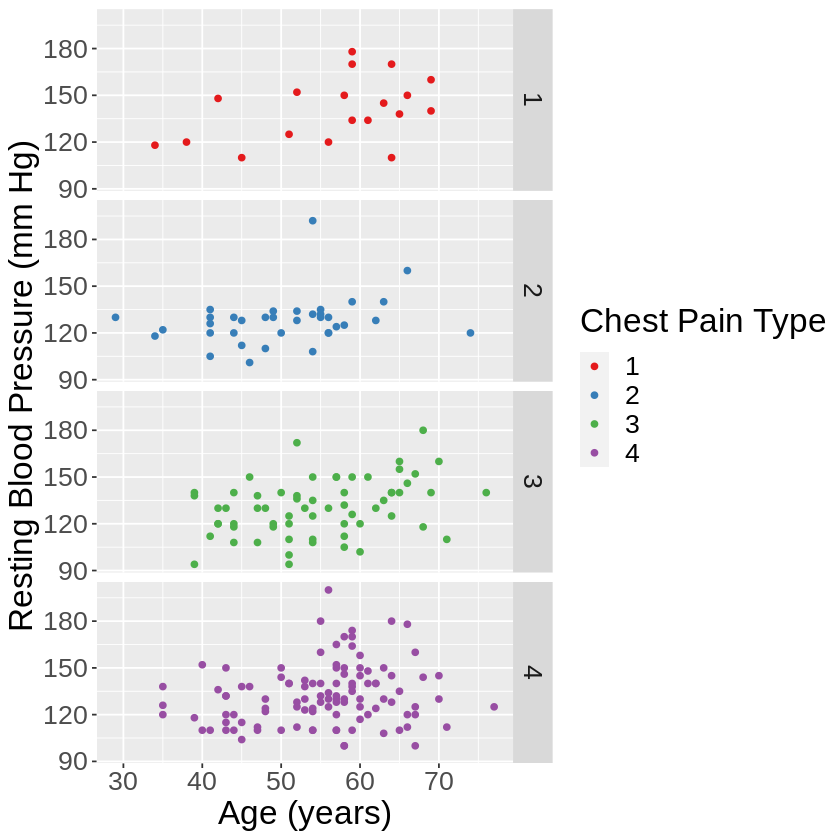

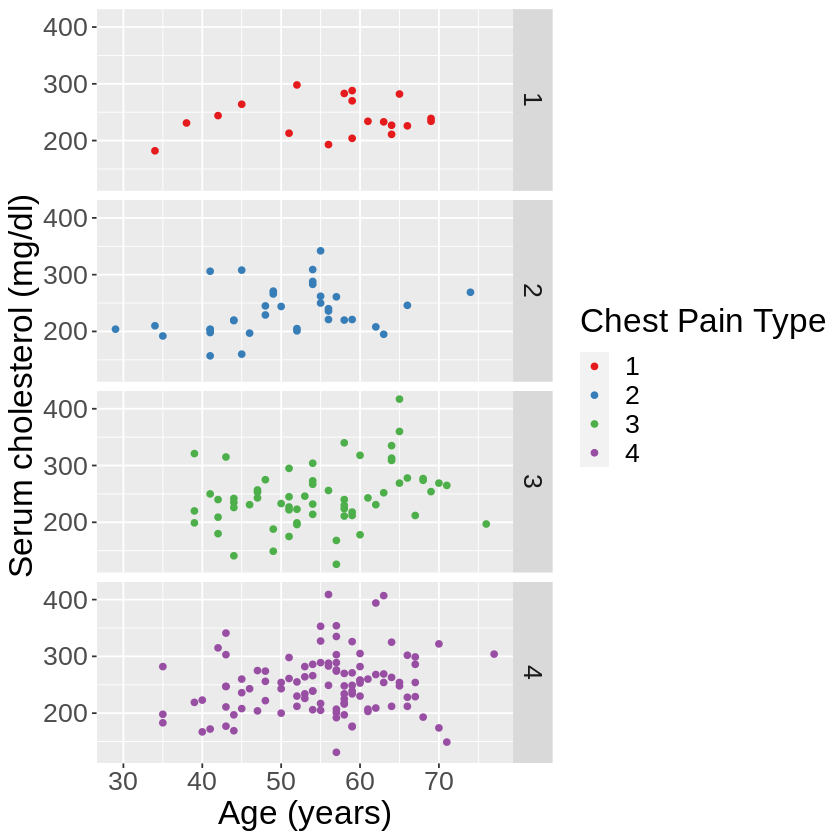

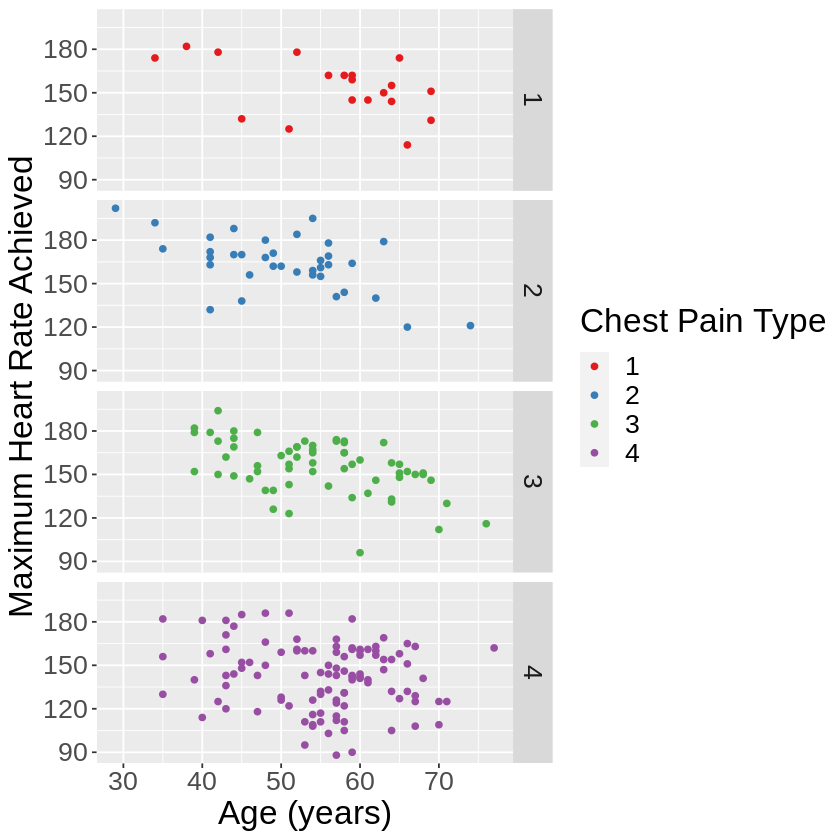

In [7]:
#using training data, visualize numeric predictors against each other to see distribution of data

restbp_plot <- heart_train |>  
    ggplot(aes(x=age, 
               y= restbp, 
               colour = cp)) +
        labs(x = "Age (years)",
             y = "Resting Blood Pressure (mm Hg)",
            colour = 'Chest Pain Type') +
        geom_point() +
        facet_grid(rows = vars(cp)) +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
restbp_plot

chol_plot <- heart_train |>  
    ggplot(aes(x=age, 
               y= chol, 
               colour = cp)) +
        labs(x = "Age (years)",
             y = "Serum cholesterol (mg/dl)",
            colour = 'Chest Pain Type') +
        geom_point() +
        facet_grid(rows = vars(cp)) +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
chol_plot

thalach_plot <- heart_train |>  
    ggplot(aes(x=age, 
               y= thalach, 
               colour = cp)) +
        labs(x = "Age (years)",
             y = "Maximum Heart Rate Achieved",
            colour = 'Chest Pain Type') +
        geom_point() +
        facet_grid(rows = vars(cp)) +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
thalach_plot

As we can see, none of the plots really show a clear, distinct relationship between our target variable chest pain type and the tested predictors. This could be for many possible reasons. We only used numeric predictors - perhaps other predictors, such as sex, could yield a more clear distribution. In testing out the relationship between more variables, we could find a better predictor, or if any variable is a good predictor for chest pain at all.

## Methods

**Conducting Data Analysis:**
1. Attach necessary libraries
2. Read in “processed Cleveland” data from https://archive.ics.uci.edu/ml/datasets/Heart+Disease
3. Tidy data
4. Split into training and testing set
5. Visualize distribution of other predictors to see distribution - maybe try to predict for `num` instead (which we have now found out is for whether heart disease is in the patient or not). Decide on predictors to use.
6. Create recipe (scale any predictors if needed), knn specification (with tune, so we can find which *k* value to use), and classifier using training set
7. Perform cross-fold validations and test the metrics with various *k* values, then plot the data to find ideal *k* value
8. Once ideal *k* value is found (one that yields a high accuracy estimate), input that into a new specification and classifier
9. Create prediction classification (via recipe, new specification, and new classifier)
10. Evaluate the estimate accuracy of the classifier on the test set using the predict function, and plot it

Variables used as predictors (so far) are: 
`age`, 
`resting blood pressure`, 
`cholesterol`, 
`heart rate achieved`, 
`sex`, and `exercise-induced angina`


**Visualizing results:** We will use a line graph to find the ideal *k* value, and a scatterplot graph to visualize the accuracy of our classifier.

## Expected Outcomes and Significance

**We expect to find:**
We expect to predict the type of chest pain (1=typical angina, 2=atypical angina, 3=non-anginal pain or 4=asymptomatic*) a patient with heart disease/conditions could expect to have based on relevent medical factors and personal information as noted by the variables of interest listed above. Since the graphs above do not show a clear distribution of data or a distinct relationship correlated with chest pain type, we will focus refining our list of chosen predictor variable to determine whether the variables chosen are effective predictors or not. 

**What impact could our findings have?**
Predicting chest pain type and therefore the severity of the chest pain can provide the physician with the necessary information needed to treat the patient's heart disease. Further data analysis could describe which factor(s), if any, directly lead to a certain chest pain type.

**What future questions could this lead to?**
- Is this classification model consistent with data in other parts of the world (eg. Hungary, Switzerland, etc)? 
- What other variables could be used in predicting chest pain that we haven't already accounted for, and if those variables were added, would that increase the estimate accuracy?
- Does there exist any diseases sharing the same predictor variables as chest pain? If so, how can we distinguish between these diseases and chest pain?